In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data = pd.read_excel('aprovacao_aluno.xlsx')

In [4]:
data.shape

(27, 3)

In [5]:
data.head(27)

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76
5,Amapa,76,75
6,Tocantins,81,82
7,Maranhao,81,81
8,Piaui,80,81
9,Ceara,86,85


In [14]:
data.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [6]:
report = dtale.show(data)
report

In [7]:
# DISCLAIMER: 'data' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(data, (pd.DatetimeIndex, pd.MultiIndex)):
	data = data.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
data = data.reset_index().drop('index', axis=1, errors='ignore')
data.columns = [str(c) for c in data.columns]  # update columns to strings in case they are numbers

scatter_data = data
scatter_data = scatter_data[['ano_2015', 'ano_2016']].dropna(how='any')
scatter_data['_corr_index'] = scatter_data.index
s0 = scatter_data['ano_2015']
s1 = scatter_data['ano_2016']
pearson = s0.corr(s1, method='pearson')
spearman = s0.corr(s1, method='spearman')
print(spearman)

#import ppscore


pearson

0.853144057442949


0.8949574876446555

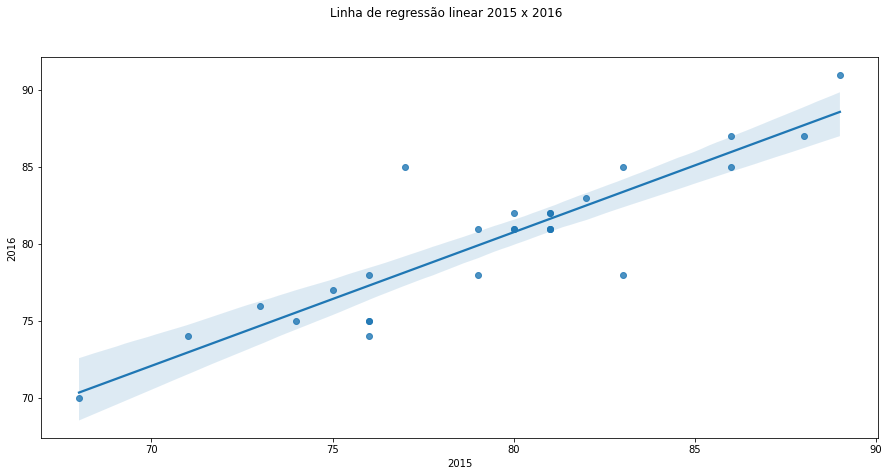

2023-05-13 22:58:36,677 - INFO     - Executing shutdown due to inactivity...
2023-05-13 22:58:36,690 - INFO     - Executing shutdown...
2023-05-13 22:58:36,692 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/flask/app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/flask/app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/flask/app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/flask/app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/dtale/app.py", line 438, in shutdown
    shu

In [9]:
ax = sns.regplot(x='ano_2015', y='ano_2016', data=data)
ax.set_xlabel('2015')
ax.set_ylabel('2016')
ax.figure.set_size_inches(15,7)
ax.figure.suptitle('Linha de regressão linear 2015 x 2016')
ax;


In [8]:
x = sm.add_constant(data.ano_2015)
y  = data.ano_2016

regressao = sm.OLS(y,x).fit()

regressao.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 13 May 2023   Prob (F-statistic):           3.02e-10
Time:                        21:59:30   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.113      -2.855      25.483
ano_2015       0.8681      0.087     10.030      0.000       0.690       1.046
==============================================================================
Omnibus:                        8.744   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               11.774
Skew:                           0.487   Prob(JB):                      0.00278
Kurtosis:                       6.085   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
data['y_previsto'] = regressao.predict()

In [71]:
data

,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089
5,Amapa,76,75,77.291450
6,Tocantins,81,82,81.632053
7,Maranhao,81,81,81.632053
8,Piaui,80,81,80.763932
9,Ceara,86,85,85.972655


In [72]:
data['residuo_erro'] = data['y_previsto'] - data['ano_2016']

In [78]:
data

,UF,ano_2015,ano_2016,y_previsto,residuo_erro
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
5,Amapa,76,75,77.291450,2.291450
6,Tocantins,81,82,81.632053,-0.367947
7,Maranhao,81,81,81.632053,0.632053
8,Piaui,80,81,80.763932,-0.236068
9,Ceara,86,85,85.972655,0.972655


In [74]:
data.describe()

,ano_2015,ano_2016,y_previsto,residuo_erro
count,27.000000,27.000000,27.000000,2.700000e+01
mean,79.333333,80.185185,80.185185,4.000092e-14
std,4.969136,4.820126,4.313808,2.150506e+00
min,68.000000,70.000000,70.346487,-6.840429e+00
25%,76.000000,76.500000,77.291450,-1.038249e+00
50%,80.000000,81.000000,80.763932,-2.360678e-01
75%,81.500000,82.500000,82.066113,6.704742e-01
max,89.000000,91.000000,88.577016,5.368294e+00


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UF            27 non-null     object 
 1   ano_2015      27 non-null     int64  
 2   ano_2016      27 non-null     int64  
 3   y_previsto    27 non-null     float64
 4   residuo_erro  27 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
pd.pivot_table(data, index=['ano_2016'], columns=['ano_2015'], values=['UF'], aggfunc='mean')


/tmp/ipykernel_16488/1475112705.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



ano_2016
70
74
75
76
77
78
81
82
83
85
